In [1]:
import os, glob, json, spacy

In [2]:
nlp = spacy.load('pt_core_news_lg')

In [3]:
annotated = glob.glob(r'../data/raw/*.json')

In [5]:
jfile = json.load(open(annotated[0], 'r', encoding='utf-8'))

In [6]:
jfile[0]

{'content': 'de: "ddp" <ddp@tce.rn.gov.br>  para: "infocex" <infocex@tce.rn.gov.br>  enviadas: quarta-feira, 5 de fevereiro de 2020 16:23:24  assunto: solicitação de dados - caop mprn   com os cumprimentos de estilo, solicito extração de dados referente a informações em anexo pleiteadas pelo caop acerca de pagamentos e empenhos endereçados a determinados servidores públicos.  .  grato desde já.   victor rafael  auditor de controle externo  diretoria de despesa com pessoal \r',
 'entities': [[11, 28, 'EMAIL'],
  [48, 69, 'EMAIL'],
  [82, 118, 'TEMPO'],
  [295, 305, 'DESPESAPUBLICA'],
  [308, 316, 'DESPESAPUBLICA']]}

In [15]:
class EntityFileGenerator():
    def __init__(self, nlp, json_files):
        self.jfiles = json_files
        self.nlp = nlp
        self.ents = {}
        self.sents = {}
        self.sents['DESPESAPESSOAL'] = []
        self.sents['DESPESAPUBLICA'] = []
        self.sents['NEGATIVO'] = []
        self.get_ents()
        self.get_sents()
        
    def has_ent(self, sent, ent_type):
        for e in self.ents[ent_type]:
            if e in sent:
                return e
        return None
        
    def get_ents(self):
        for j in self.jfiles:
            jfile = json.load(open(j, 'r', encoding='utf-8'))
            for f in jfile:
                for e in f['entities']:
                    if e[2] in self.ents.keys():
                        self.ents[e[2]].append(f['content'][e[0]:e[1]])
                    else:
                        self.ents[e[2]] = [f['content'][e[0]:e[1]]]        
            
    def get_sents(self):
        for j in self.jfiles:
            jfile = json.load(open(j, 'r', encoding='utf-8'))
            for f in jfile:
                sents = [str(s) for s in nlp(f['content']).sents]
                for s in sents:
                    e = self.has_ent(s, 'DESPESAPESSOAL') 
                    if e:
                        self.sents['DESPESAPESSOAL'].append(s)
                        continue
                    e = self.has_ent(s, 'DESPESAPUBLICA') 
                    if self.has_ent(s, 'DESPESAPUBLICA'):
                        self.sents['DESPESAPUBLICA'].append(s)
                        continue
                    self.sents['NEGATIVO'].append(s)

In [16]:
i = EntityFileGenerator(nlp, annotated)

In [17]:
i.ents

{'PF': ['anne emília costa carvalho',
  'carlos eduardo nunes alves',
  'luiz roberto leite fonseca',
  'lauro herculano rocha soares',
  'peter john arrowsmith cook junior',
  'claúdio felipe de souza',
  'cosmo ferreira da silva',
  'francilene dos santos lima',
  'francilene nascimento souza',
  'gilmar dos santos silveira',
  'hermes silveira bezerra',
  'ivone da fonseca de farias',
  'izeuda cristina de assis ribeiro',
  'jane kely ferreira mulatinho',
  'jeová borges da costa',
  'josé antônio barbosa silva',
  'josé ivan da fonseca',
  'keliane barbosa de souza',
  'maria das graças araújo dos santos',
  'neuda lopes dos santos lima',
  'neuma maria lopes dos santos melo',
  'saint cleair fernandes santos',
  'maria das dores gomes de frança',
  'fabricio vidal da cruz',
  'ana jovina de oliveira ferreira',
  'francisco cristhian bandeira lima',
  'eduardo farias',
  'maria kaline freire vieira e lima',
  'iveluska alves xavier da costa lemos',
  'victor rafael fernandes alves'

In [8]:
len(i.sents['DESPESAPESSOAL'])

0

In [9]:
len(i.sents['DESPESAPUBLICA'])

0

In [10]:
len(i.sents['NEGATIVO'])

0

In [11]:
i.sents

{'DESPESAPESSOAL': [], 'DESPESAPUBLICA': [], 'NEGATIVO': []}

In [12]:
i.ents

{}

In [13]:
json.dumps(i.ents, indent=2, ensure_ascii=False)

'{}'

In [186]:
with open(r'data\\templates\\sentencas_para_template.json', 'w') as fp:
    fp.write(json.dumps(i.sents, indent=2, ensure_ascii=False))
with open(r'data\\templates\\ents_para_template.json', 'w') as fp:
    fp.write(json.dumps(i.ents, indent=2, ensure_ascii=False))

In [156]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  

In [148]:
from spacy.lang.pt.stop_words import STOP_WORDS as pt_sw

In [158]:
desppess = ' '.join(i.sents['DESPESAPESSOAL'])
desppub = ' '.join(i.sents['DESPESAPUBLICA'])

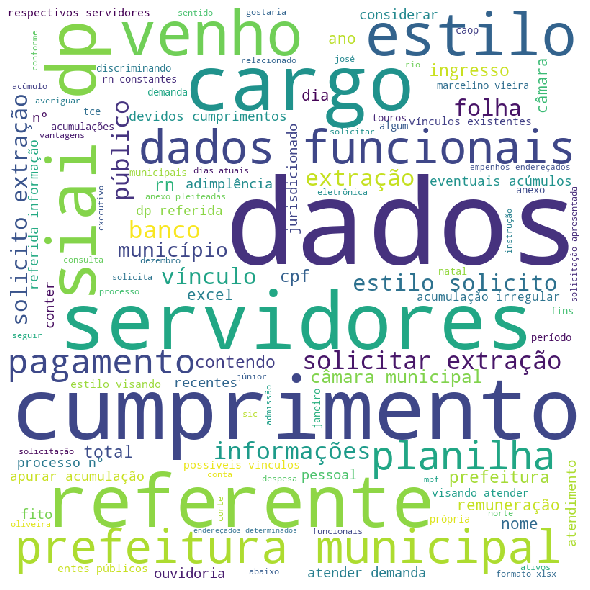

In [157]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = pt_sw, 
                min_font_size = 10).generate(desppess) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

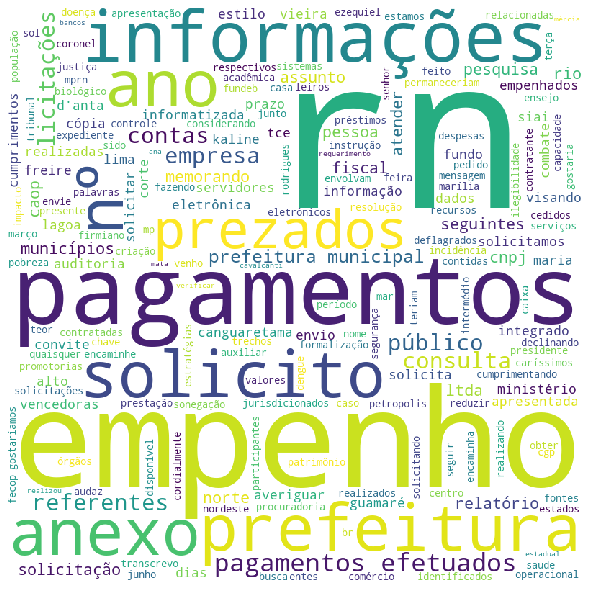

In [159]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = pt_sw, 
                min_font_size = 10).generate(desppub) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [214]:
substantivos = []

In [215]:
for j in [json.load(open(x, 'r', encoding='utf-8')) for x in annotated]:
    for x in j:
        c = x['content']
        for t in nlp(c):
            if 'NOUN' in t.pos_ and len(str(t)) > 3:
                substantivos.append(t)

In [216]:
with open(r'data\gazetteers\substantivos.txt', 'w') as f:
    for item in substantivos:
        f.write("%s\n" % item)

In [217]:
len(substantivos)

1664

ENTIDADES ESPECÍFICAS SERVUS

In [19]:
i.ents['TEMPO']

['08 de julho de 2020',
 '60(sessenta) meses',
 '10 de agosto de 2015',
 'sexta-feira, 14 de agosto de 2015',
 '01 de novembro de 2016',
 '04 de dezembro de 2017',
 '20 (vinte) dias',
 '20 dias',
 'anos de 2017 a 2019',
 'anos de 2017 a 2020',
 'a partir de fevereiro/2017',
 'anos de 2018 e 2019',
 'prazo de 15(quinze) dias',
 'mês de março de 2017',
 'janeiro de 2016 a abril de 2017',
 'dezembro de 2016',
 'de 2013 ate o momento',
 'terça-feira, 13 de março de 2018',
 'início dos anos 2000',
 'a partir do ano de 2015',
 'ano de 2012 aos dias atuais',
 'ano de 2012 aos dias atuais',
 'mês de abril de 2019',
 'mês de maio de 2019',
 'janeiro a dezembro/2016',
 'ao mês de maio/2019',
 'mês de abril de 2019',
 'janeiro de 2018 a julho de 2019',
 'mês mais atual',
 'anos de 2017 a 2019',
 'anos de 2017 a 2019',
 'terça-feira, 3 de setembro de 2019',
 'período de 2004 a 2019',
 'exercícios de 2017 e 2018',
 'anso de 2017 e 2018',
 'anos de 2018 e 2019',
 'ano de 2019',
 'outubro/2019',
 'me

In [20]:
import dateparser

In [21]:
dateparser.parse()

<function dateparser.parse(date_string, date_formats=None, languages=None, locales=None, region=None, settings=None)>

In [23]:
{t:dateparser.parse(t) for t in i.ents['TEMPO']}

{'08 de julho de 2020': datetime.datetime(2020, 7, 8, 0, 0),
 '60(sessenta) meses': None,
 '10 de agosto de 2015': datetime.datetime(2015, 8, 10, 0, 0),
 'sexta-feira, 14 de agosto de 2015': datetime.datetime(2015, 8, 14, 0, 0),
 '01 de novembro de 2016': datetime.datetime(2016, 11, 1, 0, 0),
 '04 de dezembro de 2017': datetime.datetime(2017, 12, 4, 0, 0),
 '20 (vinte) dias': None,
 '20 dias': datetime.datetime(2020, 10, 19, 14, 6, 36, 717346),
 'anos de 2017 a 2019': datetime.datetime(3, 11, 8, 14, 6, 36, 960930),
 'anos de 2017 a 2020': datetime.datetime(3, 11, 8, 14, 6, 36, 720764),
 'a partir de fevereiro/2017': None,
 'anos de 2018 e 2019': None,
 'prazo de 15(quinze) dias': None,
 'mês de março de 2017': None,
 'janeiro de 2016 a abril de 2017': None,
 'dezembro de 2016': datetime.datetime(2016, 12, 8, 0, 0),
 'de 2013 ate o momento': None,
 'terça-feira, 13 de março de 2018': datetime.datetime(2018, 3, 13, 0, 0),
 'início dos anos 2000': None,
 'a partir do ano de 2015': None,
 

In [1]:
from nltk_opennlp.taggers import OpenNLPTagger

In [2]:
opennlp_bin = '/home/eduardo/Downloads/apache-opennlp-1.9.3-src/opennlp-tools/bin'

In [ ]:
tt = OpenNLPTagger(language='pt',
                    path_to_bin=opennlp_bin,
                    path_to_model=os.path.join('/path/to/opennlp/models', 'en-pos-maxent.bin'))